In [37]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from Bidder import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap

In [38]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [39]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  32%|███▏      | 5306/16384 [00:01<00:03, 3006.63it/s]


Stopping at Epoch 5306



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 3902.24it/s]


AUC predicting P(win):				 0.7325636249872154
Estimated Utility	 Mean Error:			 0.4700945545311492
Estimated Utility	 Mean Absolute Error:	 0.49088591733481335



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1206.24it/s]


Predicted mu Gammas:  tensor(0.9855, grad_fn=<MinBackward1>) tensor(1.0063, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0509, grad_fn=<MinBackward1>) tensor(0.0548, grad_fn=<MaxBackward1>) tensor(0.0520, grad_fn=<MeanBackward0>)



DR 1:  15%|█▌        | 5050/32768 [00:06<00:38, 724.45it/s]


Stopping at Epoch 5050
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.6820439 0.82236046 0.74716365
agent: 1




DR 2:  28%|██▊       | 4600/16384 [00:01<00:02, 4036.86it/s]


Stopping at Epoch 4600



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4153.08it/s]


AUC predicting P(win):				 0.6801270272463081
Estimated Utility	 Mean Error:			 0.27794280781043246
Estimated Utility	 Mean Absolute Error:	 0.2985905034914263



Initialising Policy:  32%|███▏      | 5246/16384 [00:04<00:09, 1195.71it/s]


Stopping at Epoch 5246
Predicted mu Gammas:  tensor(0.9952, grad_fn=<MinBackward1>) tensor(1.0011, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0413, grad_fn=<MinBackward1>) tensor(0.0747, grad_fn=<MaxBackward1>) tensor(0.0511, grad_fn=<MeanBackward0>)



DR 2:  14%|█▍        | 4564/32768 [00:05<00:36, 783.00it/s]


Stopping at Epoch 4564
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  0.65714234 0.8344321 0.73476315
agent: 2




DR 3:  29%|██▉       | 4760/16384 [00:01<00:04, 2815.10it/s]


Stopping at Epoch 4760



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4099.39it/s]


AUC predicting P(win):				 0.8875593741909978
Estimated Utility	 Mean Error:			 0.8046521158194879
Estimated Utility	 Mean Absolute Error:	 0.8577552247128587



Initialising Policy:  80%|███████▉  | 13069/16384 [00:10<00:02, 1221.69it/s]


Stopping at Epoch 13069
Predicted mu Gammas:  tensor(0.9900, grad_fn=<MinBackward1>) tensor(1.0054, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0306, grad_fn=<MinBackward1>) tensor(0.1303, grad_fn=<MaxBackward1>) tensor(0.0482, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 73/32768 [00:00<00:45, 721.51it/s]

Epoch 00122: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 225/32768 [00:00<00:43, 748.88it/s]

Epoch 00223: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 301/32768 [00:00<00:43, 750.43it/s]

Epoch 00324: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 454/32768 [00:00<00:43, 750.80it/s]

Epoch 00425: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 540/32768 [00:00<00:43, 744.09it/s]

Epoch 00526: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 540
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1



agent: 0




DR 1:  11%|█         | 1776/16384 [00:00<00:03, 4472.17it/s]


Stopping at Epoch 1776
AUC predicting P(win):				 0.7620027206204091
Estimated Utility	 Mean Error:			 -0.007959392417699357
Estimated Utility	 Mean Absolute Error:	 0.08437020124350869



DR 1:  21%|██        | 6905/32768 [00:01<00:06, 4062.21it/s]

Epoch 06178: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06489: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06746: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  23%|██▎       | 7556/32768 [00:01<00:06, 4031.55it/s]


Epoch 07003: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07260: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07517: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7556
AUC predicting P(win):				 0.7654593820225034
Estimated Utility	 Mean Error:			 0.013015880179877972
Estimated Utility	 Mean Absolute Error:	 0.09130828138825306



DR 1:   6%|▌         | 1982/32768 [00:02<00:41, 747.93it/s]


Stopping at Epoch 1982
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.6507921 0.75384384 0.6995644
agent: 1




DR 2:  44%|████▎     | 7130/16384 [00:02<00:03, 2462.41it/s]


Stopping at Epoch 7130
AUC predicting P(win):				 0.5904082233569783
Estimated Utility	 Mean Error:			 0.4860579164475297
Estimated Utility	 Mean Absolute Error:	 0.5530698521535481



DR 2:  83%|████████▎ | 27182/32768 [00:06<00:01, 4200.81it/s]

Epoch 26502: reducing learning rate of group 0 to 6.0000e-04.
Epoch 26768: reducing learning rate of group 0 to 1.2000e-04.
Epoch 27025: reducing learning rate of group 0 to 2.4000e-05.
Epoch 27282: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  86%|████████▌ | 28084/32768 [00:06<00:01, 4149.40it/s]


Epoch 27539: reducing learning rate of group 0 to 9.6000e-07.
Epoch 27796: reducing learning rate of group 0 to 1.9200e-07.
Epoch 28053: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 28084
AUC predicting P(win):				 0.6101019459701426
Estimated Utility	 Mean Error:			 0.6407141740318587
Estimated Utility	 Mean Absolute Error:	 0.684466093663824



DR 2:  12%|█▏        | 3776/32768 [00:04<00:35, 827.29it/s]


Stopping at Epoch 3776
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  0.5838467 0.7165078 0.62592787
agent: 2




DR 3:   7%|▋         | 1067/16384 [00:00<00:04, 3353.03it/s]


Stopping at Epoch 1067
AUC predicting P(win):				 0.8474584186517659
Estimated Utility	 Mean Error:			 0.0723153213220027
Estimated Utility	 Mean Absolute Error:	 0.26027127209891854



DR 3:  60%|██████    | 19782/32768 [00:04<00:03, 4103.50it/s]

Epoch 19158: reducing learning rate of group 0 to 6.0000e-04.
Epoch 19500: reducing learning rate of group 0 to 1.2000e-04.
Epoch 19757: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  63%|██████▎   | 20551/32768 [00:05<00:02, 4090.61it/s]


Epoch 20014: reducing learning rate of group 0 to 4.8000e-06.
Epoch 20271: reducing learning rate of group 0 to 9.6000e-07.
Epoch 20528: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 20551
AUC predicting P(win):				 0.8535036659166374
Estimated Utility	 Mean Error:			 0.07231542840112451
Estimated Utility	 Mean Absolute Error:	 0.2602713534117675



DR 3:   1%|          | 249/32768 [00:00<00:39, 820.38it/s]

Epoch 00109: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00210: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 415/32768 [00:00<00:39, 819.04it/s]

Epoch 00311: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00412: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 660/32768 [00:00<00:40, 801.91it/s]

Epoch 00513: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00614: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   3%|▎         | 825/32768 [00:01<00:39, 805.63it/s]

Epoch 00715: reducing learning rate of group 0 to 8.9600e-08.
Epoch 00816: reducing learning rate of group 0 to 1.7920e-08.



DR 3:   3%|▎         | 1086/32768 [00:01<00:40, 782.56it/s]


Stopping at Epoch 1086
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3279.73it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8277391118877855
Estimated Utility	 Mean Error:			 -0.011310055482872191
Estimated Utility	 Mean Absolute Error:	 0.21064742227185476



DR 1:  57%|█████▋    | 18772/32768 [00:04<00:03, 4062.12it/s]

Epoch 18276: reducing learning rate of group 0 to 6.0000e-04.
Epoch 18540: reducing learning rate of group 0 to 1.2000e-04.
Epoch 18797: reducing learning rate of group 0 to 2.4000e-05.
Epoch 19054: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  60%|██████    | 19738/32768 [00:04<00:03, 4046.67it/s]


Epoch 19311: reducing learning rate of group 0 to 9.6000e-07.
Epoch 19568: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 19738
AUC predicting P(win):				 0.8276158061967747
Estimated Utility	 Mean Error:			 0.02451867721202706
Estimated Utility	 Mean Absolute Error:	 0.21837998559371632



DR 1:   3%|▎         | 1083/32768 [00:01<00:38, 812.64it/s]


Stopping at Epoch 1083
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.56186426 0.73166126 0.6567717
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3329.47it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.6344929276058249
Estimated Utility	 Mean Error:			 0.03745698094493606
Estimated Utility	 Mean Absolute Error:	 0.269667133253644



DR 2:  23%|██▎       | 7426/32768 [00:01<00:06, 4076.34it/s]

Epoch 07065: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07414: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07671: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  26%|██▋       | 8612/32768 [00:02<00:05, 4030.12it/s]


Epoch 07928: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08185: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08442: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8612
AUC predicting P(win):				 0.6675492762934936
Estimated Utility	 Mean Error:			 0.0594153244785627
Estimated Utility	 Mean Absolute Error:	 0.2797102395853162



DR 2:   5%|▍         | 1488/32768 [00:01<00:38, 822.93it/s]


Stopping at Epoch 1488
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  0.64566034 0.81801033 0.73397815
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3012.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8753484112898915
Estimated Utility	 Mean Error:			 -0.003941868254769238
Estimated Utility	 Mean Absolute Error:	 0.3196690548535656



DR 3:  15%|█▌        | 4925/32768 [00:01<00:06, 4108.01it/s]

Epoch 04507: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04943: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05200: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  19%|█▉        | 6173/32768 [00:01<00:06, 4079.44it/s]


Epoch 05457: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05714: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05971: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6173
AUC predicting P(win):				 0.8797482282352918
Estimated Utility	 Mean Error:			 -0.003941868254769238
Estimated Utility	 Mean Absolute Error:	 0.3196690548535656



DR 3:   6%|▌         | 1871/32768 [00:02<00:38, 804.61it/s]


Stopping at Epoch 1871
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.96070486 1.0 0.9992789


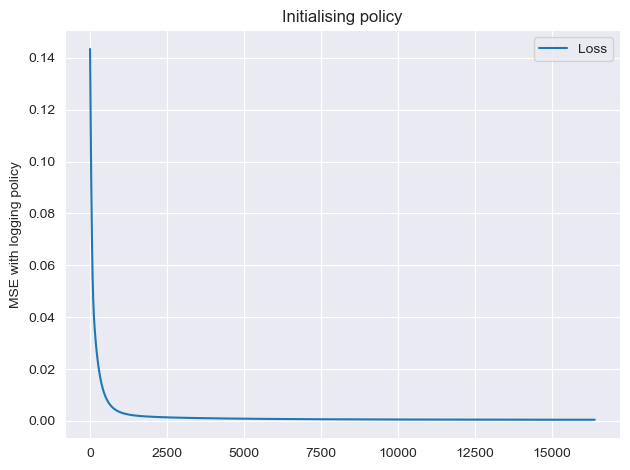

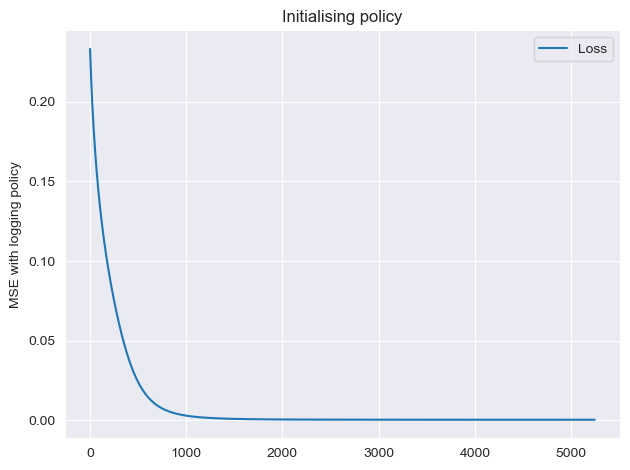

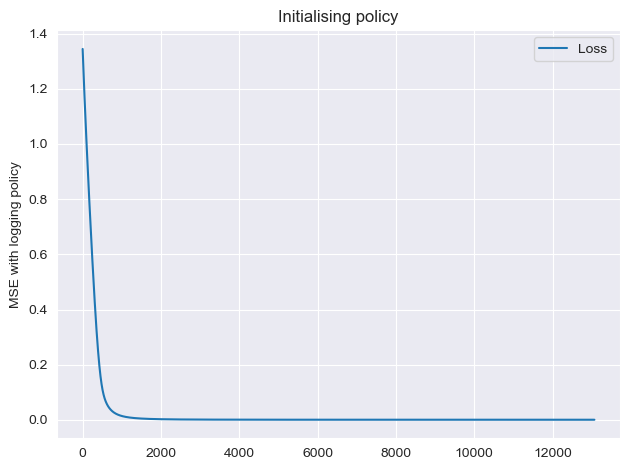

In [40]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [41]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [52000, 8000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

In [42]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [43]:
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'DR_L_{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [44]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [45]:
param_grid = {
    # limiting the depth of the tree to 10 can still get a good result with 0.8
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [46]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

# cv fault is 5

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
CV score for GS 0.8788708497445883
Test R2 score: 0.8829987238985224
Train MSE:  0.0017286265521712957
Test MSE:  0.004116719197377103
Agent 1
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8982808431563383
Test R2 score: 0.915869238958472
Train MSE:  0.0008173142365745388
Test MSE:  0.0019668475424553904
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.8468009805009095
Test R2 score: 0.8475576874204718
Train MSE:  0.006391112036389942
Test MSE:  0.011251595484128678


In [56]:
# Auction with original model

# Placeholders for output
auction_revenue_trained = []
social_welfare_trained = []
social_surplus_trained = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for _ in tqdm(range(rounds_per_iter)):
    # Simulate impression opportunities
    auction.simulate_opportunity()

# Log 'Gross utility' or welfare
social_welfare_trained.append(sum([agent.gross_utility for agent in auction.agents]))
print(social_welfare_trained)

# Log 'Net utility' or surplus
social_surplus_trained.append(sum([agent.net_utility for agent in auction.agents]))

# Update agents (does nothing in this example, as we have truthful oracles)
# Clear running metrics
for agent_id, agent in enumerate(auction.agents):
    print(f'agent: {agent_id}\n' )
    agent.clear_utility()
    agent.clear_logs()

# Log revenue
auction_revenue_trained.append(auction.revenue)
auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue_trained = np.array(auction_revenue_trained) / rounds_per_iter
social_welfare_trained = np.array(social_welfare_trained) / rounds_per_iter
social_surplus_trained = np.array(social_surplus_trained) / rounds_per_iter

  0%|          | 0/10000 [00:00<?, ?it/s]

[5265.48849135039]
agent: 0

agent: 1

agent: 2



In [57]:
auction_revenue_trained

array([0.43791116])

In [58]:
social_welfare_trained

array([0.52654885])

In [59]:
social_surplus_trained

array([0.08863769])

In [60]:
from copy import copy, deepcopy

In [61]:
agents_surrogate = deepcopy(agents)

In [66]:
for agent in agents:
    print(agent.bidder)

In [17]:
context_bid_estimators.keys()

dict_keys([0, 1, 2])

In [63]:
for i, agent in enumerate(agents_surrogate):
    agent.bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[i])

In [65]:
auction.agents = agents_surrogate

In [67]:
for agent in auction.agents:
    print(agent.bidder)

In [68]:
# Placeholders for output
auction_revenue_surrogate = []
social_welfare_surrogate = []
social_surplus_surrogate = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py

for _ in tqdm(range(rounds_per_iter)):
    # Simulate impression opportunities
    auction.simulate_opportunity()

# Log 'Gross utility' or welfare
social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction.agents]))

# Log 'Net utility' or surplus
social_surplus_surrogate.append(sum([agent.net_utility for agent in auction.agents]))

# Update agents (does nothing in this example, as we have truthful oracles)
# Clear running metrics
for agent_id, agent in enumerate(auction.agents):
    print(f'agent: {agent_id}\n' )
    agent.clear_utility()
    agent.clear_logs()

# Log revenue
auction_revenue_surrogate.append(auction.revenue)
auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

  0%|          | 0/10000 [00:00<?, ?it/s]

agent: 0

agent: 1

agent: 2



In [69]:
auction_revenue_surrogate

array([0.43649961])

In [70]:
social_welfare_surrogate

array([0.52404606])

In [71]:
social_surplus_surrogate

array([0.08754644])

In [299]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.024177103849533664
Surrogate utility: 0.022457464446702585
R2 score: 0.7480383951257003
Agent: 1
Original utility: -0.011352402715902469
Surrogate utility: -0.011976056842977778
R2 score: 0.8697296504394383
Agent: 2
Original utility: 0.04247413235161559
Surrogate utility: 0.04326502529411769
R2 score: 0.9007667259100549


<AxesSubplot:>

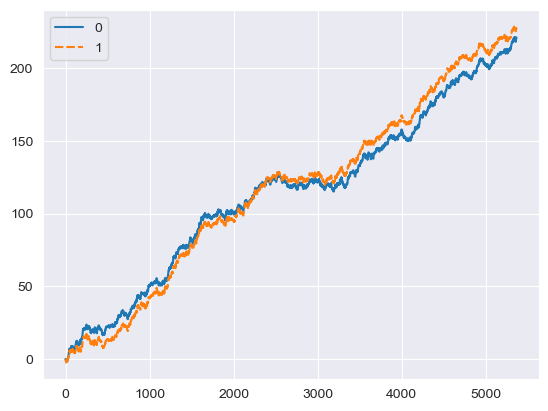

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

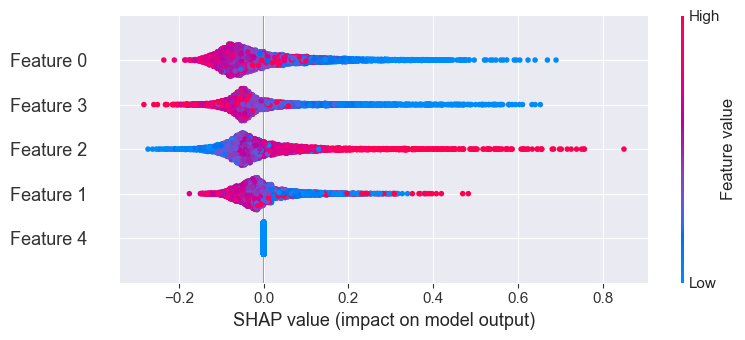

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2